# Multiple Linear Regression-Economics Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv('27.12 Dataset/modified_synthetic_economic_data.csv')

In [3]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,1,2.67,6.26,163.338471
1,2017,2,1.75,5.20,-8.822741
2,2017,3,3.85,5.28,633.650508
3,2017,4,4.83,6.36,822.275239
4,2017,5,2.14,2.98,348.846955


In [7]:
df_index.drop(columns=['year','month'],axis=1,inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.67,6.26,163.338471
1,1.75,5.20,-8.822741
2,3.85,5.28,633.650508
3,4.83,6.36,822.275239
4,2.14,2.98,348.846955


In [11]:
# Check the null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [13]:
# Lets do some visulization
import seaborn as sns

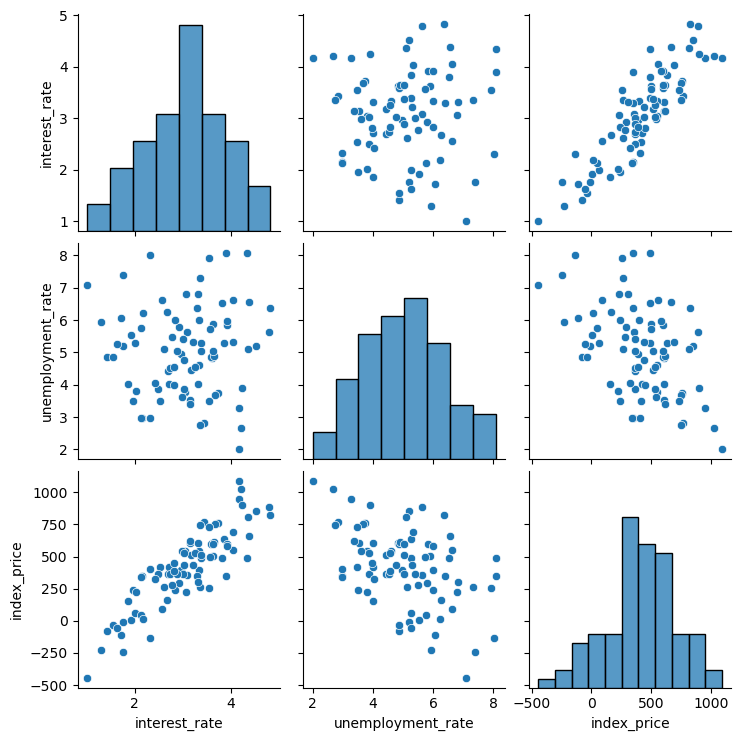

In [20]:
sns.pairplot(df_index)
plt.show()

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.026670,0.873367
unemployment_rate,0.026670,1.000000,-0.463594
index_price,0.873367,-0.463594,1.000000


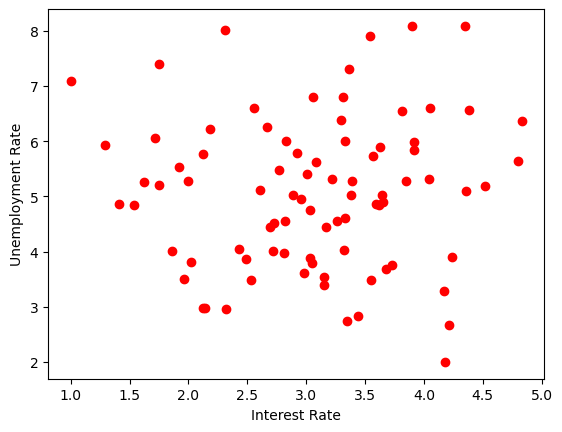

In [22]:
# Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [23]:
# independent and dependent feature
x=df_index.iloc[:,:-1]   #x=df_index([['interest_rate','unemployment_rate']])
y=df_index.iloc[:,-1]

In [24]:
x.head()

,interest_rate,unemployment_rate
0,2.67,6.26
1,1.75,5.20
2,3.85,5.28
3,4.83,6.36
4,2.14,2.98


In [25]:
# Train text split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
import seaborn as sns


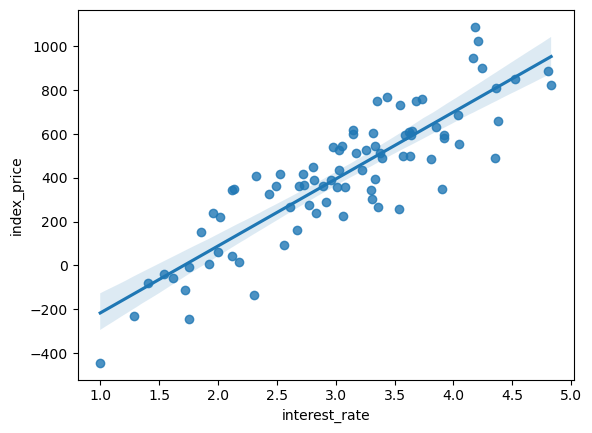

In [33]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

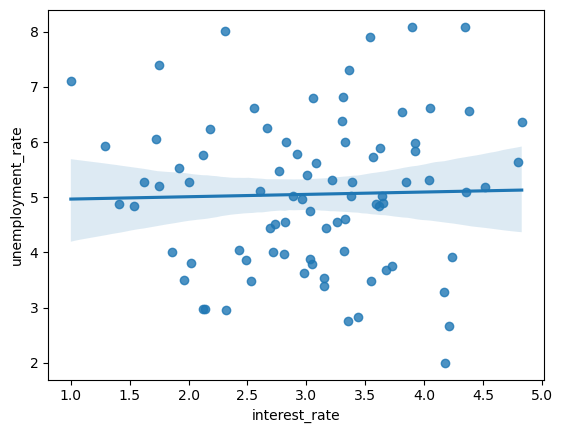

In [37]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

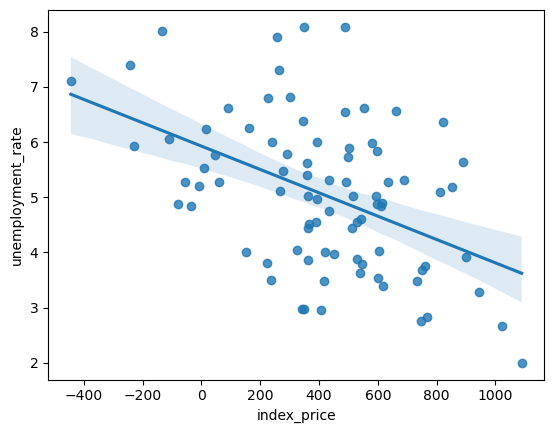

In [39]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [51]:
x_train

array([[-0.53706556, -0.54467559],
       [-2.18354392,  0.56176668],
       [ 0.46258201,  2.03207252],
       [-0.97220627, -1.64369207],
       [ 1.25053952, -1.85903989],
       [ 0.21561026,  0.62117298],
       [ 1.94441254,  0.34641886],
       [ 1.06237056,  1.0667202 ],
       [-0.26657269,  0.45037988],
       [-0.37241772,  0.62117298],
       [ 1.42694791, -0.05457364],
       [ 1.61511687,  0.01225844],
       [-1.20741746,  0.44295409],
       [-1.67783985,  0.65830191],
       [-0.13720653, -0.3070504 ],
       [ 0.00392019, -1.32438322],
       [-1.44262866,  0.2647352 ],
       [-0.84284011, -0.84170707],
       [ 0.28617362,  0.07909053],
       [-1.32502306, -1.01250017],
       [ 0.02744131, -0.5372498 ],
       [ 0.78011713,  1.01473969],
       [ 1.97969422,  0.88107553],
       [ 1.05061   ,  0.10879367],
       [ 0.88596216,  2.16573668],
       [ 1.20349728, -1.3986411 ],
       [ 0.90948328,  0.4949346 ],
       [ 0.55666649, -0.2476441 ],
       [ 0.18032858,

In [53]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [61]:
regression.fit(x_train,y_train)

LinearRegression()

In [67]:
# Cross velidation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [71]:
np.mean(validation_score)

-0.2358080186939057

In [73]:
# Prediction
y_pred=regression.predict(x_test)
y_pred

array([ 191.01716905,  216.92785574, -430.27935691,  841.97286266,
        320.49564738,  663.56866903,  611.17318277,  673.96538082,
        395.89576993,  142.3618716 ,  279.59313701,  606.28476817,
        845.09936085,  574.10030044,  832.90745547, -213.0153795 ,
        477.42827262,  -25.46673179,  615.55403885,  671.5710893 ,
        676.16620119])

In [79]:
# Performence Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3862.091309738719
59.1289345395718
62.14572639963845


In [81]:
# r_squared error
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9629033778728812


In [83]:
# Display adjusted r_squared error
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.958781530969868


# Assumptions


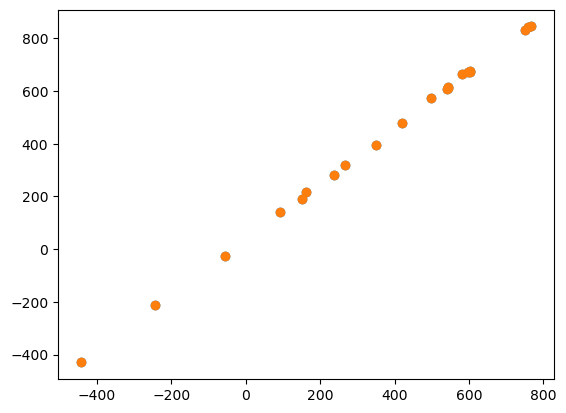

In [88]:
plt.scatter(y_test,y_pred)
plt.show()

In [90]:
residuals=y_test-y_pred
print(residuals)

73   -38.877929
0    -53.589385
58   -13.718636
22   -82.342018
12   -54.235022
70   -82.909893
10   -66.571067
18   -77.150739
4    -47.048815
65   -50.564876
40   -41.962285
47   -65.262548
35   -77.198161
81   -75.253195
55   -81.273702
54   -30.482228
33   -58.619454
76   -31.157083
42   -71.704748
49   -69.317698
11   -72.468142
Name: index_price, dtype: float64


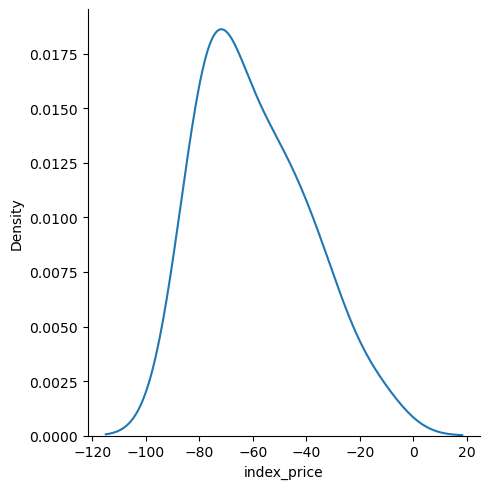

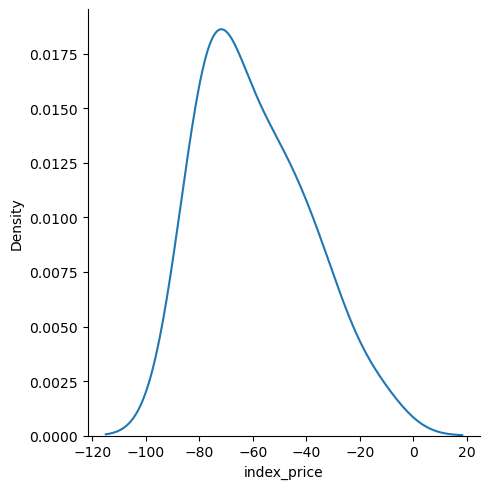

In [94]:
# plot this residuals
sns.displot(residuals,kind='kde')
plt.show()

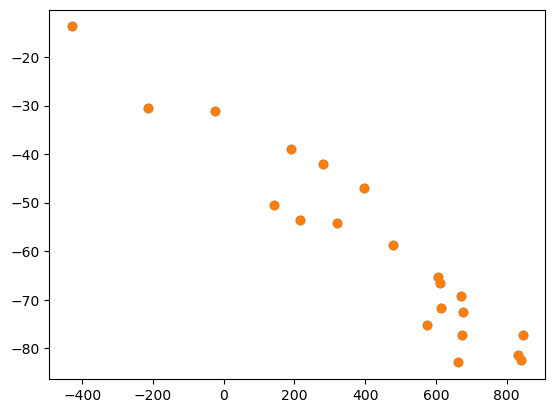

In [98]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
plt.show()

In [102]:
# ols Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.311
Model:                            OLS   Adj. R-squared (uncentered):              0.288
Method:                 Least Squares   F-statistic:                              13.77
Date:                Tue, 29 Jul 2025   Prob (F-statistic):                    1.16e-05
Time:                        16:01:43   Log-Likelihood:                         -470.97
No. Observations:                  63   AIC:                                      945.9
Df Residuals:                      61   BIC:                                      950.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           263.6854     54.972      4.797      0.000     153.761     373.609
x2          -143.7828     54.972     -2.616      0.011    -253.707     -33.859
==============================================================================
Omnibus:                      121.322   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5336.170
Skew:                           6.244   Prob(JB):                         0.00
Kurtosis:                      46.323   Cond. No.                         1.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
print(regression.coef_)

[ 263.68538375 -143.78279137]
